In [1]:
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import numpy as np
import gzip
import math
import linmix
np.random.seed(2)

In [2]:
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 16
plt.rcParams['xtick.minor.size'] = 9
plt.rcParams['ytick.major.size'] = 16
plt.rcParams['ytick.minor.size'] = 9
plt.rcParams['ytick.minor.size'] = 9
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.minor.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.minor.width'] = 2.5
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.pad'] = 9
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
plt.rcParams['axes.titlesize'] = 30
plt.rcParams.update({'font.size': 30})

In [2]:
fullmergedf = pd.read_csv('fullmergePAB.csv')
fullmergebaddf = pd.read_csv('fullmergebadPAB.csv')
dcmergedf = pd.read_csv('dcmergePAB.csv')
dustdf = pd.read_csv('dustdfPAB.csv')
dustcurvesdf = pd.read_csv('dustcurvesdf.csv')
attdf = pd.read_csv('attdfPAB.csv')
fullcleardf = pd.read_csv('clearPAB.csv')
sortedpabdf = pd.read_csv('sortedpabdf.csv')
sortedclearmergedf = pd.read_csv('sortedclearmergedf.csv')
stddf = pd.read_csv('stddf.csv')
limitdf = pd.read_csv('limitdf.csv')
limitbetanegdf = pd.read_csv('limitbetanegdf.csv')

In [4]:
display(fullmergedf)

,FIELD,ID,RA_x,DEC_x,Z_50,Z_ERR,PAB_FLUX,PAB_FLUX_ERR,OBS_PAB,id3DHST,...,PAB_SFR,PAB_SFR_ERR,UV_SFR_ERR,PAB_SFR_EX2,PAB_SFR_EX2_ladder,PAB_SFR_EX2_ERR,PAB_SFR_LL,PAB_SFR_EX2_LL,PAB_SFR_LL_1SIGMA,PAB_SFR_EX_LL_1SIGMA
0,GN1,37683,189.306089,62.360350,0.277481,0.001144,3.907847,1.367054,16377.307364,37683,...,-0.035078,0.151823,0.074554,-0.301065,-0.230999,0.169141,-1.127231,-1.393218,-1.315057,-1.581044
1,GN2,19221,189.201266,62.240702,0.139631,0.002470,19.445505,2.126779,14610.064284,19221,...,-0.005105,0.047467,0.051236,-0.279978,-0.268314,0.069845,-1.794139,-2.069013,-1.981966,-2.256839
2,GN2,15610,189.212722,62.222423,0.199242,0.007588,14.520550,2.317139,15374.278308,15610,...,0.208897,0.069256,0.018728,-0.006275,0.100078,0.071744,-1.453302,-1.668474,-1.641128,-1.856300
3,GN2,18157,189.182293,62.232458,0.196814,0.027064,3.889960,1.627647,15343.154062,18157,...,-0.375045,0.181595,0.067536,-0.164748,-0.164748,0.193747,-1.465206,-1.254908,-1.653032,-1.442735
4,GN2,21693,189.232524,62.248474,0.281981,0.023462,2.519289,1.432714,16434.994103,21693,...,-0.209675,0.246815,0.031651,1.412949,1.412949,0.248836,-1.111169,0.511456,-1.298995,0.323629
5,GN3,34456,189.339813,62.324291,0.211290,0.010113,27.507629,2.862229,15695.781592,34456,...,0.543534,0.045159,0.041423,0.234438,0.324106,0.061279,-1.396135,-1.705231,-1.583962,-1.893057
6,GN3,34157,189.206826,62.321196,0.245119,0.014142,28.282754,2.688524,15962.430241,34157,...,0.701403,0.041256,0.035539,0.678385,0.807885,0.054452,-1.250334,-1.273352,-1.438161,-1.461178
7,GN3,33397,189.175470,62.314347,0.245053,0.010841,6.159068,1.908827,15961.576268,33397,...,0.039128,0.134506,0.035696,0.060551,0.208641,0.139162,-1.250603,-1.229179,-1.438429,-1.417006
8,GN3,33511,189.234550,62.314768,0.256401,0.009254,4.371808,1.187729,16107.064381,33511,...,-0.064933,0.117909,0.052148,0.443706,0.590699,0.128926,-1.205809,-0.697171,-1.393636,-0.884998
9,GN3,34368,189.338526,62.320968,0.228424,0.005207,4.132371,0.995737,15748.400334,34368,...,-0.203389,0.104577,0.010805,0.135720,0.156775,0.105133,-1.319804,-0.980695,-1.507630,-1.168521


In [3]:
display(fullmergedf[['FIELD' , 'ID' , 'OBS_PAB']])

,FIELD,ID,OBS_PAB
0,GN1,37683,16377.307364
1,GN2,19221,14610.064284
2,GN2,15610,15374.278308
3,GN2,18157,15343.154062
4,GN2,21693,16434.994103
5,GN3,34456,15695.781592
6,GN3,34157,15962.430241
7,GN3,33397,15961.576268
8,GN3,33511,16107.064381
9,GN3,34368,15748.400334


In [10]:
np.median(fullmergedf['PAB_FLUX'][fullmergedf['PAB_FLUX']/fullmergedf['PAB_FLUX_ERR'] > 3]/fullmergedf['PAB_FLUX_ERR'][fullmergedf['PAB_FLUX']/fullmergedf['PAB_FLUX_ERR'] > 3])

4.984504983558744

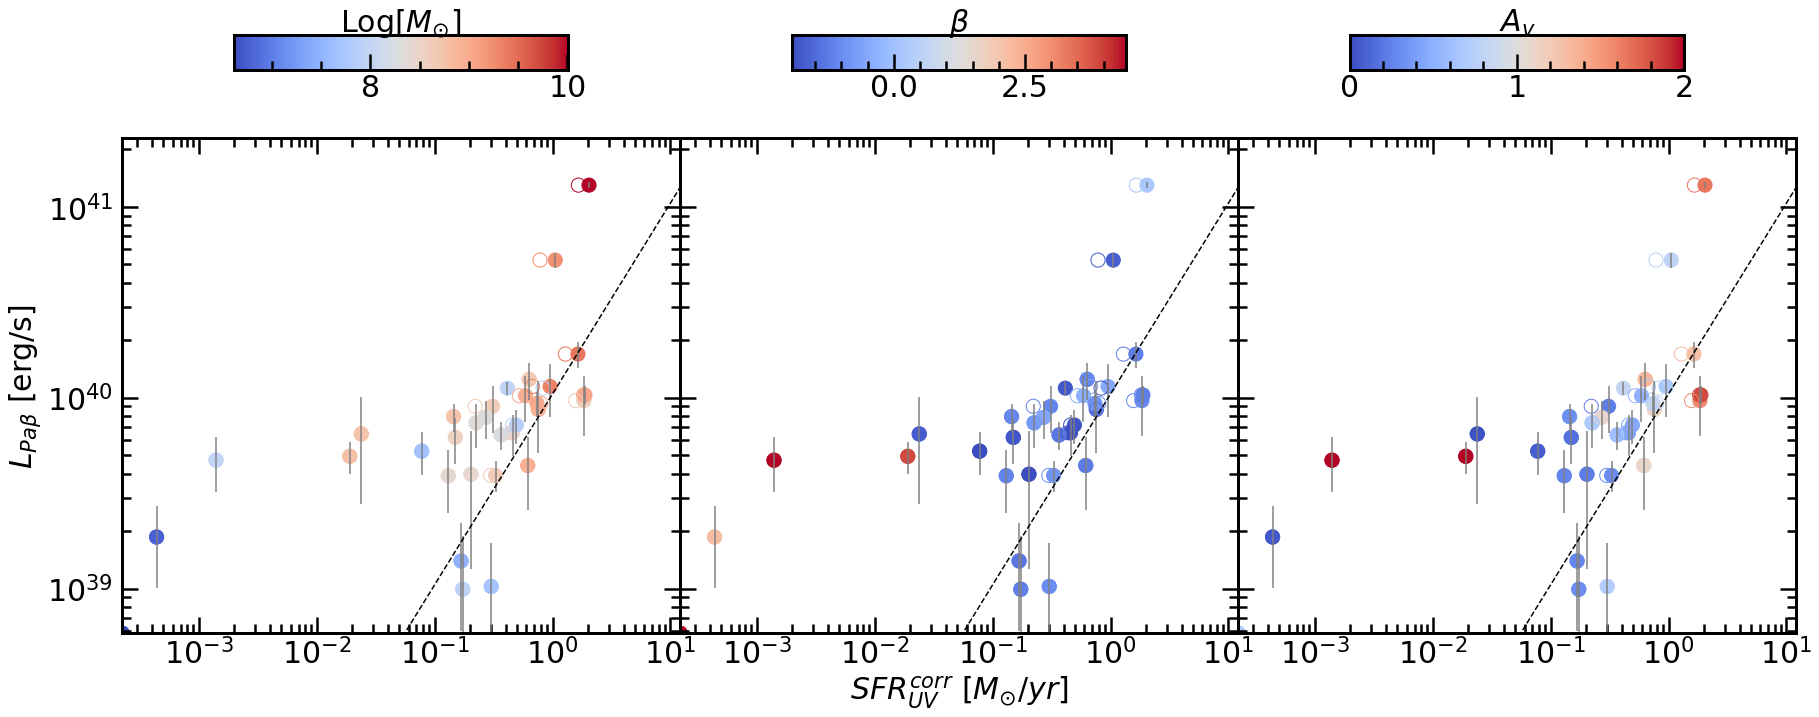

In [4]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{Pa\beta}$ [erg/s]")
y0 = ax0.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['td_lmass'], cmap='coolwarm')
ax0.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax0.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-6 , max(fullmergedf['ir_SFR-UV_corr']) + 10 , min(fullmergedf['PAB_L']) - 10**36, max(fullmergedf['PAB_L'])  + 10**41])
scatterdots = ax0.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['td_lmass'], cmap='coolwarm')
scatterdots.set_facecolor('none') 
ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]")
y1 = ax1.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_UV_beta'], cmap='coolwarm')
ax1.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax1.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-6 , max(fullmergedf['ir_SFR-UV_corr']) + 10 , min(fullmergedf['PAB_L']) - 10**36, max(fullmergedf['PAB_L'])  + 10**41])
scatterdots1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_UV_beta'], cmap='coolwarm')
scatterdots1.set_facecolor('none') 
ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_SFR-ladder_total_Av'], cmap='coolwarm' , vmin = 0 , vmax = 2)
ax2.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax2.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-6 , max(fullmergedf['ir_SFR-UV_corr']) + 10 , min(fullmergedf['PAB_L']) - 10**36, max(fullmergedf['PAB_L'])  + 10**41])
scatterdots2 = ax2.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_SFR-ladder_total_Av'], cmap='coolwarm' , vmin = 0 , vmax = 2)
scatterdots2.set_facecolor('none') 
ax2.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax2.tick_params(labelleft = False)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'Log$[M_{\odot}]$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$\beta$')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = '$A_v$')
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')

plt.show()

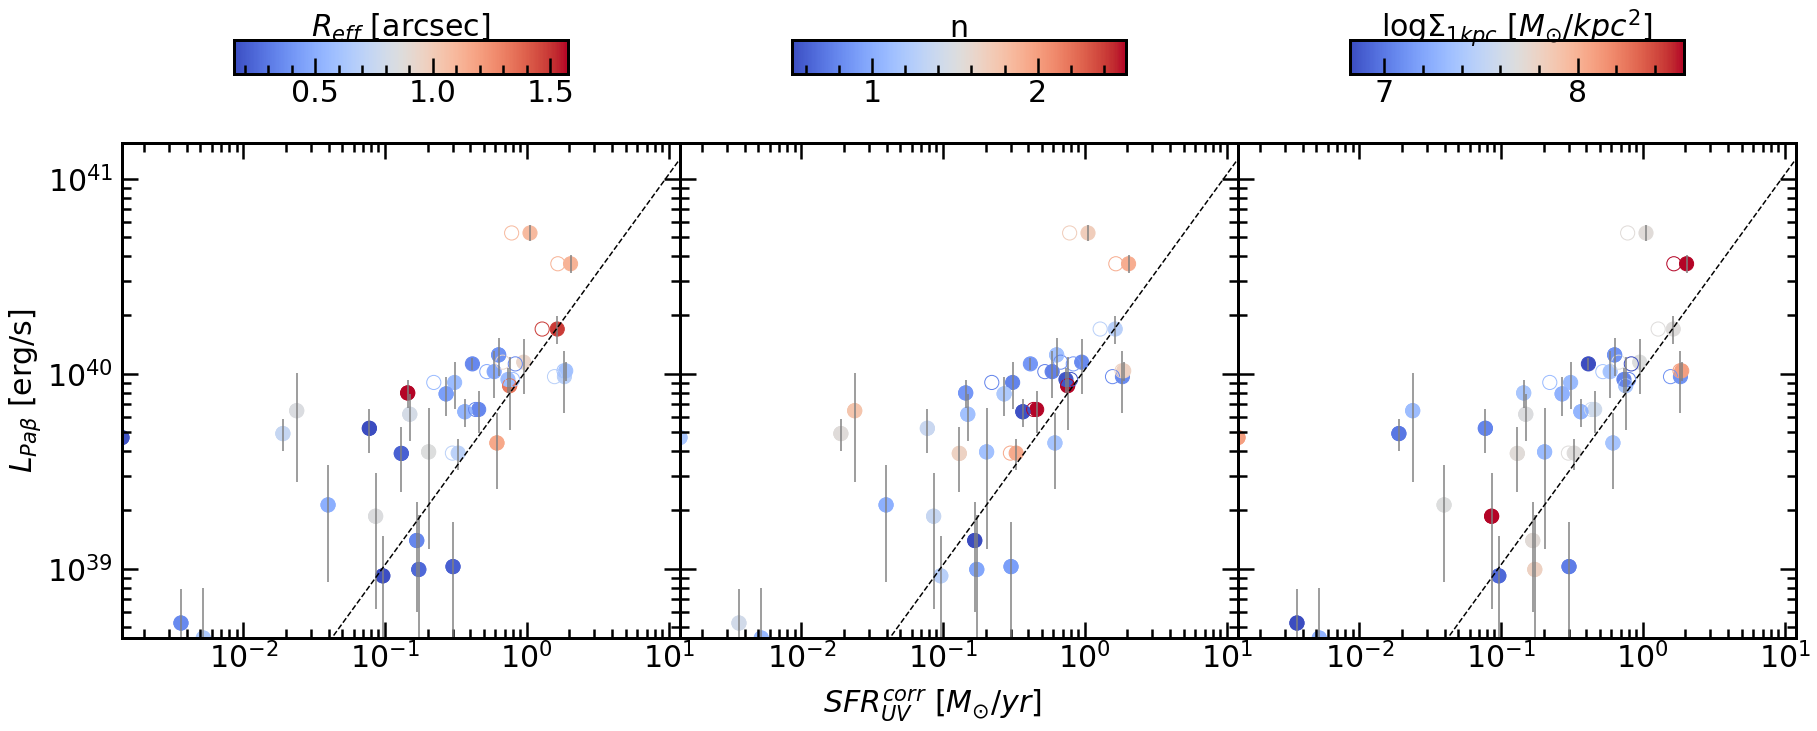

In [7]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{Pa\beta}$ [erg/s]")
y0 = ax0.scatter(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
ax0.errorbar(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0]  , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0]  , yerr = fullmergedf['PAB_L_ERR'][fullmergedf['gf_f_j'] == 0]   , linestyle = 'None' , c = 'grey' )
ax0.axis([min(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) -10**-6 , max(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) + 10 , min(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] ) - 10**36, max(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] )  + 10**41])
scatterdots = ax0.scatter(fullmergedf['ir_SFR-ladder_total'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
scatterdots.set_facecolor('none') 
#ax0.scatter(10**ylpab , 10**xlpab, s = 10 , c = 'black')
ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax1 = fig.add_subplot(gs[2:12, 5:10])
y1 = ax1.scatter(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
ax1.errorbar(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0]  , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0]  , yerr = fullmergedf['PAB_L_ERR'][fullmergedf['gf_f_j'] == 0]   , linestyle = 'None' , c = 'grey' )
ax1.axis([min(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) -10**-6 , max(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) + 10 , min(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] ) - 10**36, max(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] )  + 10**41])
scatterdots1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
scatterdots1.set_facecolor('none') 
ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
ax2.errorbar(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0]  , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0]  , yerr = fullmergedf['PAB_L_ERR'][fullmergedf['gf_f_j'] == 0]   , linestyle = 'None' , c = 'grey' )
ax2.axis([min(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) -10**-6 , max(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) + 10 , min(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] ) - 10**36, max(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] )  + 10**41])
scatterdots2 = ax2.scatter(fullmergedf['ir_SFR-ladder_total'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
scatterdots2.set_facecolor('none') 
ax2.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax2.tick_params(labelleft = False)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = '$R_{eff}$ [arcsec]')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'n')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14]) 
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')

fig.text(0.5,0.04, r"$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]", ha="center", va="center")
plt.show()

In [6]:
lmre = linmix.LinMix(fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0], fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0], fullmergedf['gf_dre_j'][fullmergedf['gf_f_j'] == 0], fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['gf_f_j'] == 0] , K = 2, seed = 2)
lmre.run_mcmc(silent = True) 

lmn = linmix.LinMix(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0], fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0], fullmergedf['gf_dn_j'][fullmergedf['gf_f_j'] == 0], fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['gf_f_j'] == 0] , K = 2, seed = 2)
lmn.run_mcmc(silent = True) 

lmsigma = linmix.LinMix(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0], fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0], [.3]* len(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0]), fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['gf_f_j'] == 0] , K = 2, seed = 2)
lmsigma.run_mcmc(silent = True) 

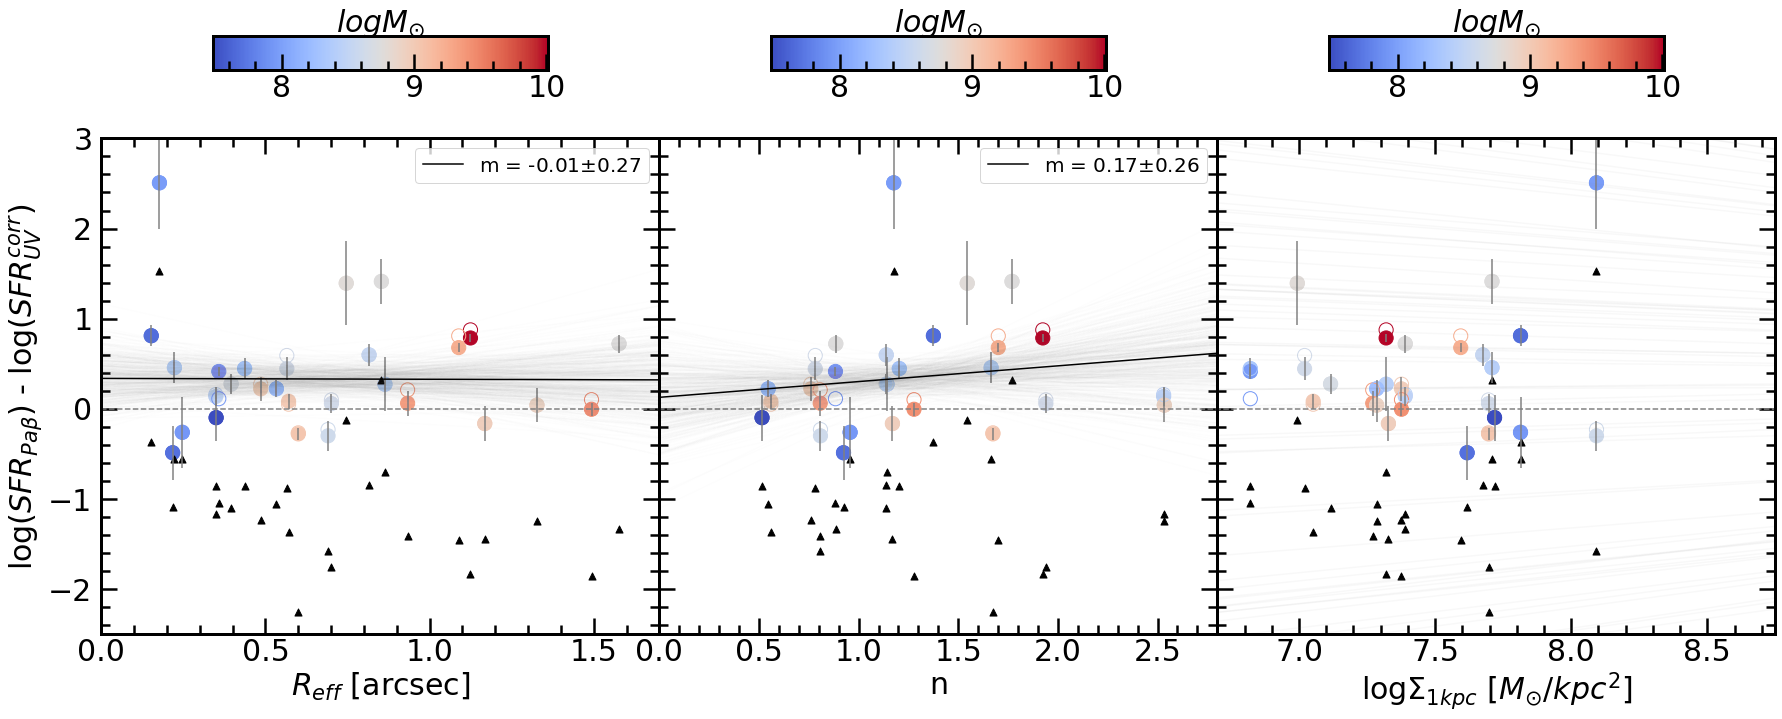

In [14]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel(r"$R_{eff}$ [arcsec]")
y0 = ax0.scatter(fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'coolwarm')
scatterdots0 = ax0.scatter(fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2_ladder'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'coolwarm')
scatterdots0.set_facecolor('none')
ax0.errorbar(fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , yerr = fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['gf_f_j'] == 0] , c = 'gray',  linestyle = 'None')
ax0.scatter(fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'][fullmergedf['gf_f_j'] == 0] , s = 50 , marker = '^' , c = 'black')
ax0.axis([0 , 1.7 , -2.5 , 3])
ax0.plot([0 , 2] , [0 , 0] , '--' , c = 'gray')
for i in range(0, len(lmre.chain), 25):
    xs = np.arange(-4,4)
    ys = lmre.chain[i]['alpha'] + xs * lmre.chain[i]['beta']
    ax0.plot(xs, ys, color='gray', alpha=0.01)
ax0.plot([0 , 2] , [np.mean(lmre.chain['alpha']) + np.mean(lmre.chain['beta'])*0 , np.mean(lmre.chain['alpha']) + np.mean(lmre.chain['beta'])*2] , c = 'black' , label = 'm = ' + str(round(np.mean(lmre.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmre.chain['beta']), 2))  )
#ax0.plot(xs, ys, color='k')
ax0.legend()

ax1 = fig.add_subplot(gs[2:12, 5:10])
y1= ax1.scatter(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'coolwarm')
scatterdots1 = ax1.scatter(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2_ladder'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'coolwarm')
scatterdots1.set_facecolor('none')
ax1.errorbar(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , yerr = fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['gf_f_j'] == 0] , c = 'gray',  linestyle = 'None')
ax1.scatter(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'][fullmergedf['gf_f_j'] == 0] , s = 50 , marker = '^' , c = 'black')
ax1.plot([0 , 8] , [0 , 0] , '--' , c = 'gray')
ax1.set_xlabel(r"n")
ax1.axis([0 , 2.8 , -2.5 , 3])
ax1.tick_params(labelleft = False)
for i in range(0, len(lmn.chain), 25):
    xsn = np.arange(-4,4)
    ysn = lmn.chain[i]['alpha'] + xsn * lmn.chain[i]['beta']
    ax1.plot(xsn, ysn, color='gray', alpha=0.01)

ax1.plot([0 , 8] , [np.mean(lmn.chain['alpha']) + np.mean(lmn.chain['beta'])*0 , np.mean(lmn.chain['alpha']) + np.mean(lmn.chain['beta'])*8] , c = 'black' , label = 'm = ' + str(round(np.mean(lmn.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmn.chain['beta']), 2)))
ax1.legend()

ax2 = fig.add_subplot(gs[2:12, 10:15])
ax2.set_xlabel(r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
y2 = ax2.scatter(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'coolwarm')
scatterdots2 = ax2.scatter(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2_ladder'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'coolwarm')
scatterdots2.set_facecolor('none')
ax2.errorbar(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , yerr = fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['gf_f_j'] == 0] , c = 'gray',  linestyle = 'None')
ax2.scatter(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'][fullmergedf['gf_f_j'] == 0] , s = 50 , marker = '^' , c = 'black')
ax2.axis([6.7 , 8.75 , -2.5 , 3])
ax2.plot([0 , 10] , [0 , 0] , '--' , c = 'gray')
ax2.tick_params(labelleft = False)
for i in range(0, len(lmsigma.chain), 25):
    xs = np.arange(3 , 11)
    ys = lmsigma.chain[i]['alpha'] + xsn * lmsigma.chain[i]['beta']
    ax2.plot(xs, ys, color='gray', alpha=0.05)
#ax1.plot(xsn, ysn, color='k')
# ax2.plot([0 , 10] , [np.mean(lmsigma.chain['alpha']) + np.mean(lmsigma.chain['beta'])*0 , np.mean(lmsigma.chain['alpha']) + np.mean(lmsigma.chain['beta'])*10] , c = 'black' , label ='m = ' + str(round(np.mean(lmsigma.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmsigma.chain['beta']), 2)))
#ax2.legend(loc = 'upper left')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = '$logM_{\odot}$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = '$logM_{\odot}$')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = '$logM_{\odot}$')
ax5.xaxis.set_label_position('top')
plt.show()

In [10]:
lmmass = linmix.LinMix(fullmergedf['td_lmass'][fullmergedf['ir_UV_beta'] < 0], fullmergedf['PAB_SFR_EX2'][fullmergedf['ir_UV_beta'] < 0], [.3]* len(fullmergedf['td_lmass'][fullmergedf['ir_UV_beta'] < 0]), fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['ir_UV_beta'] < 0], K = 2, seed = 2)
lmmass.run_mcmc(silent = True) 

lmmassall = linmix.LinMix(fullmergedf['td_lmass'], fullmergedf['PAB_SFR_EX2'], [.3]* len(fullmergedf['td_lmass']), fullmergedf['PAB_SFR_EX2_ERR'], K = 2, seed = 2)
lmmassall.run_mcmc(silent = True) 

lmbetaneg = linmix.LinMix(fullmergedf['ir_UV_beta'][fullmergedf['ir_UV_beta'] < 0], fullmergedf['PAB_SFR_EX2'][fullmergedf['ir_UV_beta'] < 0], [.3]* len(fullmergedf['ir_UV_beta'][fullmergedf['ir_UV_beta'] < 0]), fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['ir_UV_beta'] < 0] , K = 2, seed = 2)
lmbetaneg.run_mcmc(silent = True) 

lmbetapos = linmix.LinMix(fullmergedf['ir_UV_beta'][fullmergedf['ir_UV_beta'] > 0], fullmergedf['PAB_SFR_EX2'][fullmergedf['ir_UV_beta'] > 0], [.3]* len(fullmergedf['ir_UV_beta'][fullmergedf['ir_UV_beta'] > 0]), fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['ir_UV_beta'] > 0] , K = 2, seed = 2)
lmbetapos.run_mcmc(silent = True) 

lmbetaol = linmix.LinMix(fullmergedf['ir_UV_beta'], fullmergedf['PAB_SFR_EX2'], [.3]* len(fullmergedf['ir_UV_beta']), fullmergedf['PAB_SFR_EX2_ERR'] , K = 2, seed = 2)
lmbetaol.run_mcmc(silent = True) 

lmav = linmix.LinMix(fullmergedf['td_Av'], fullmergedf['PAB_SFR_EX2'], [.3]* len(fullmergedf['td_Av']), fullmergedf['PAB_SFR_EX2_ERR'] , K = 2, seed = 2)
lmav.run_mcmc(silent = True) 

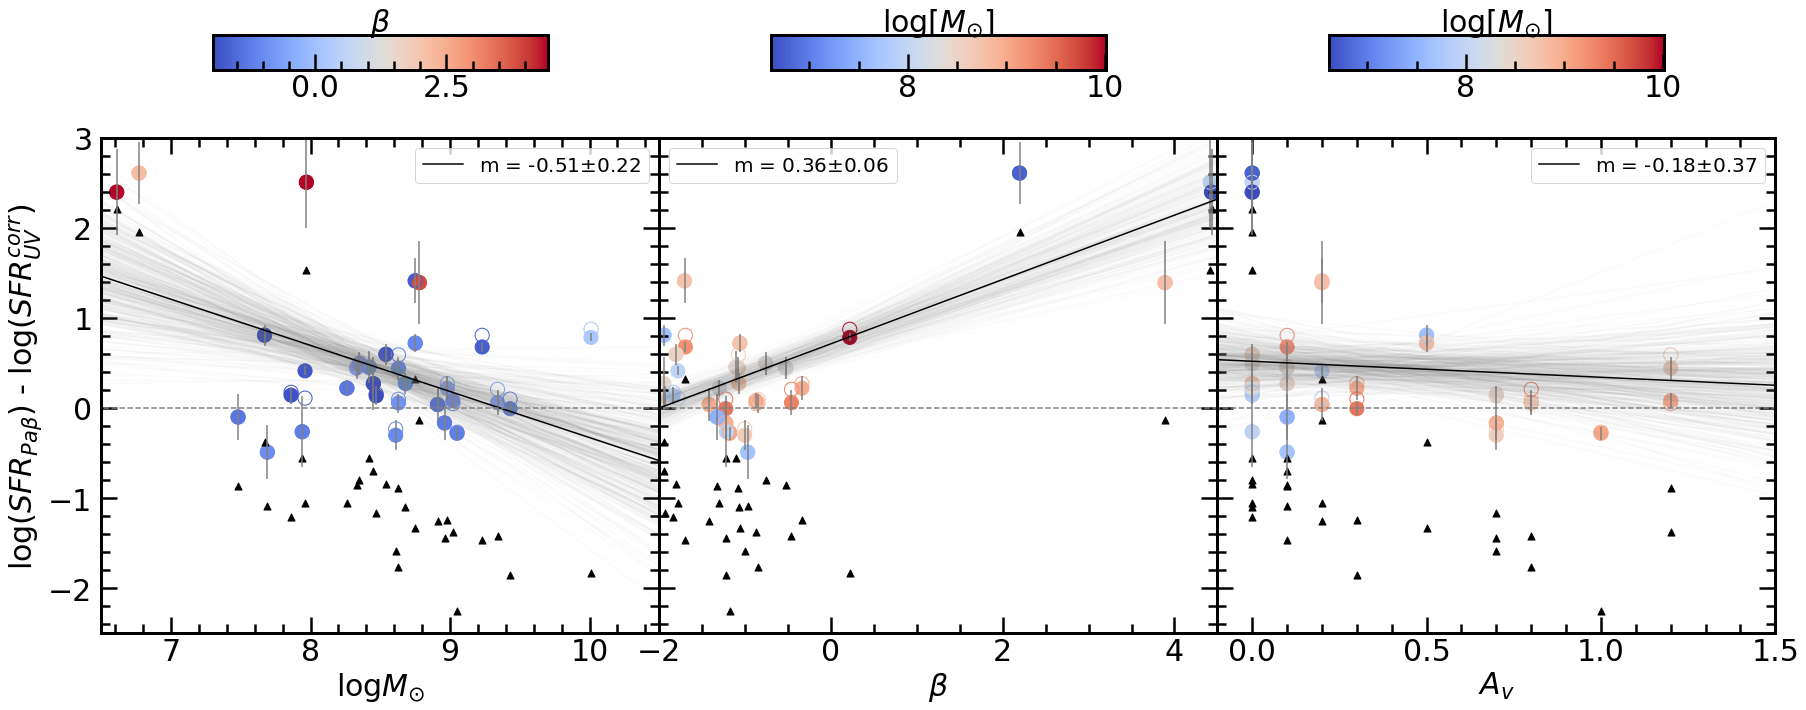

In [12]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
y0 = ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['ir_UV_beta'] , cmap = 'coolwarm')
scatterdots0 = ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2_ladder'] , s = 200 , c = fullmergedf['ir_UV_beta'] , cmap = 'coolwarm')
scatterdots0.set_facecolor('none')
ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 50 , marker = '^' , c = 'black')
ax0.errorbar(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
# for i in range(0, len(lmmass.chain), 25):
#     xs = np.arange(6,12)
#     ys = lmmass.chain[i]['alpha'] + xs * lmmass.chain[i]['beta']
#     ax0.plot(xs, ys, color='gray', alpha=0.03)
# ax0.plot([6.5 , 10.5] , [np.mean(lmmass.chain['alpha']) + np.mean(lmmass.chain['beta'])*6.5 , np.mean(lmmass.chain['alpha']) + np.mean(lmmass.chain['beta'])*10.5] , c = 'black' , label = 'm = ' + str(round(np.mean(lmmass.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmmass.chain['beta']), 2))  )
for i in range(0, len(lmmassall.chain), 25):
    xs = np.arange(6,12)
    ys = lmmassall.chain[i]['alpha'] + xs * lmmassall.chain[i]['beta']
    ax0.plot(xs, ys, color='gray', alpha=0.03)
ax0.plot([6.5 , 10.5] , [np.mean(lmmassall.chain['alpha']) + np.mean(lmmassall.chain['beta'])*6.5 , np.mean(lmmassall.chain['alpha']) + np.mean(lmmassall.chain['beta'])*10.5] , c = 'black' , label = 'm = ' + str(round(np.mean(lmmassall.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmmassall.chain['beta']), 2))  )

ax0.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel(r"log$M_{\odot}$")
ax0.axis([6.5 , 10.5 , -2.5 , 3])
ax0.legend()

#beta figure
ax1 = fig.add_subplot(gs[2:12, 5:10])
y1 = ax1.scatter(fullmergedf['ir_UV_beta'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['td_lmass'] , cmap = 'coolwarm')
scatterdots1 = ax1.scatter(fullmergedf['ir_UV_beta'] , fullmergedf['PAB_SFR_EX2_ladder'] , s = 200 , c = fullmergedf['td_lmass'] , cmap = 'coolwarm')
scatterdots1.set_facecolor('none')
ax1.scatter(fullmergedf['ir_UV_beta'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 50 , marker = '^' , c = 'black')
ax1.errorbar(fullmergedf['ir_UV_beta'] , fullmergedf['PAB_SFR_EX2'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
# #beta < 0 fit
# for i in range(0, len(lmbetaneg.chain), 25):
#     xs = np.arange(-2,1)
#     ys = lmbetaneg.chain[i]['alpha'] + xs * lmbetaneg.chain[i]['beta']
#     ax1.plot(xs, ys, color='blue', alpha=0.01)
# ax1.plot([-2 , 0] , [np.mean(lmbetaneg.chain['alpha']) + np.mean(lmbetaneg.chain['beta'])*-2 , np.mean(lmbetaneg.chain['alpha']) + np.mean(lmbetaneg.chain['beta'])*0] , c = 'blue' , label = 'm = ' + str(round(np.mean(lmbetaneg.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmbetaneg.chain['beta']), 2))  )
# #beta > 0 fit
# for i in range(0, len(lmbetapos.chain), 25):
#     xs = np.arange(0,6)
#     ys = lmbetapos.chain[i]['alpha'] + xs * lmbetapos.chain[i]['beta']
#     ax1.plot(xs, ys, color='red', alpha=0.01)
# ax1.plot([0 , 4.5] , [np.mean(lmbetapos.chain['alpha']) + np.mean(lmbetapos.chain['beta'])*0 , np.mean(lmbetapos.chain['alpha']) + np.mean(lmbetapos.chain['beta'])*4.5] , c = 'red' , label = 'm = ' + str(round(np.mean(lmbetapos.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmbetapos.chain['beta']), 2))  )
#beta one line fit
for i in range(0, len(lmbetaol.chain), 25):
    xs = np.arange(-2,6)
    ys = lmbetaol.chain[i]['alpha'] + xs * lmbetaol.chain[i]['beta']
    ax1.plot(xs, ys, color='gray', alpha=0.01)
ax1.plot([-2 , 6] , [np.mean(lmbetaol.chain['alpha']) + np.mean(lmbetaol.chain['beta'])*-2 , np.mean(lmbetaol.chain['alpha']) + np.mean(lmbetaol.chain['beta'])*6] , c = 'black' , label = 'm = ' + str(round(np.mean(lmbetaol.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmbetaol.chain['beta']), 2))  )

ax1.plot([-2.5 , 4.5] , [0 , 0] , '--' , c = 'gray')
ax1.set_xlabel(r"$\beta$")
ax1.axis([-2 , 4.5 , -2.5 , 3])
ax1.tick_params(labelleft = False)
ax1.legend()

ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(fullmergedf['td_Av'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['td_lmass'] , cmap = 'coolwarm')
scatterdots2 = ax2.scatter(fullmergedf['td_Av'] , fullmergedf['PAB_SFR_EX2_ladder'] , s = 200 , c = fullmergedf['td_lmass'] , cmap = 'coolwarm')
scatterdots2.set_facecolor('none')
ax2.scatter(fullmergedf['td_Av'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 50 , marker = '^' , c = 'black')
ax2.errorbar(fullmergedf['td_Av'] , fullmergedf['PAB_SFR_EX2'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , ls = 'None' , c = 'gray')
ax2.plot([-2.5 , 4.5] , [0 , 0] , '--' , c = 'gray')
ax2.set_xlabel(r"$A_v$")
ax2.axis([-.1 , 1.5 , -2.5 , 3])
ax2.tick_params(labelleft = False)
for i in range(0, len(lmav.chain), 25):
    xs = np.arange(-.5,2)
    ys = lmav.chain[i]['alpha'] + xs * lmav.chain[i]['beta']
    ax2.plot(xs, ys, color='gray', alpha=0.03)
ax2.plot([-.5 , 1.5] , [np.mean(lmav.chain['alpha']) + np.mean(lmav.chain['beta'])*-.5 , np.mean(lmav.chain['alpha']) + np.mean(lmav.chain['beta'])*1.5] , c = 'black' , label = 'm = ' + str(round(np.mean(lmav.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmav.chain['beta']), 2))  )
ax2.legend()

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$\beta$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'log$[M_{\odot}]$')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = r'log$[M_{\odot}]$')
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')

plt.show()

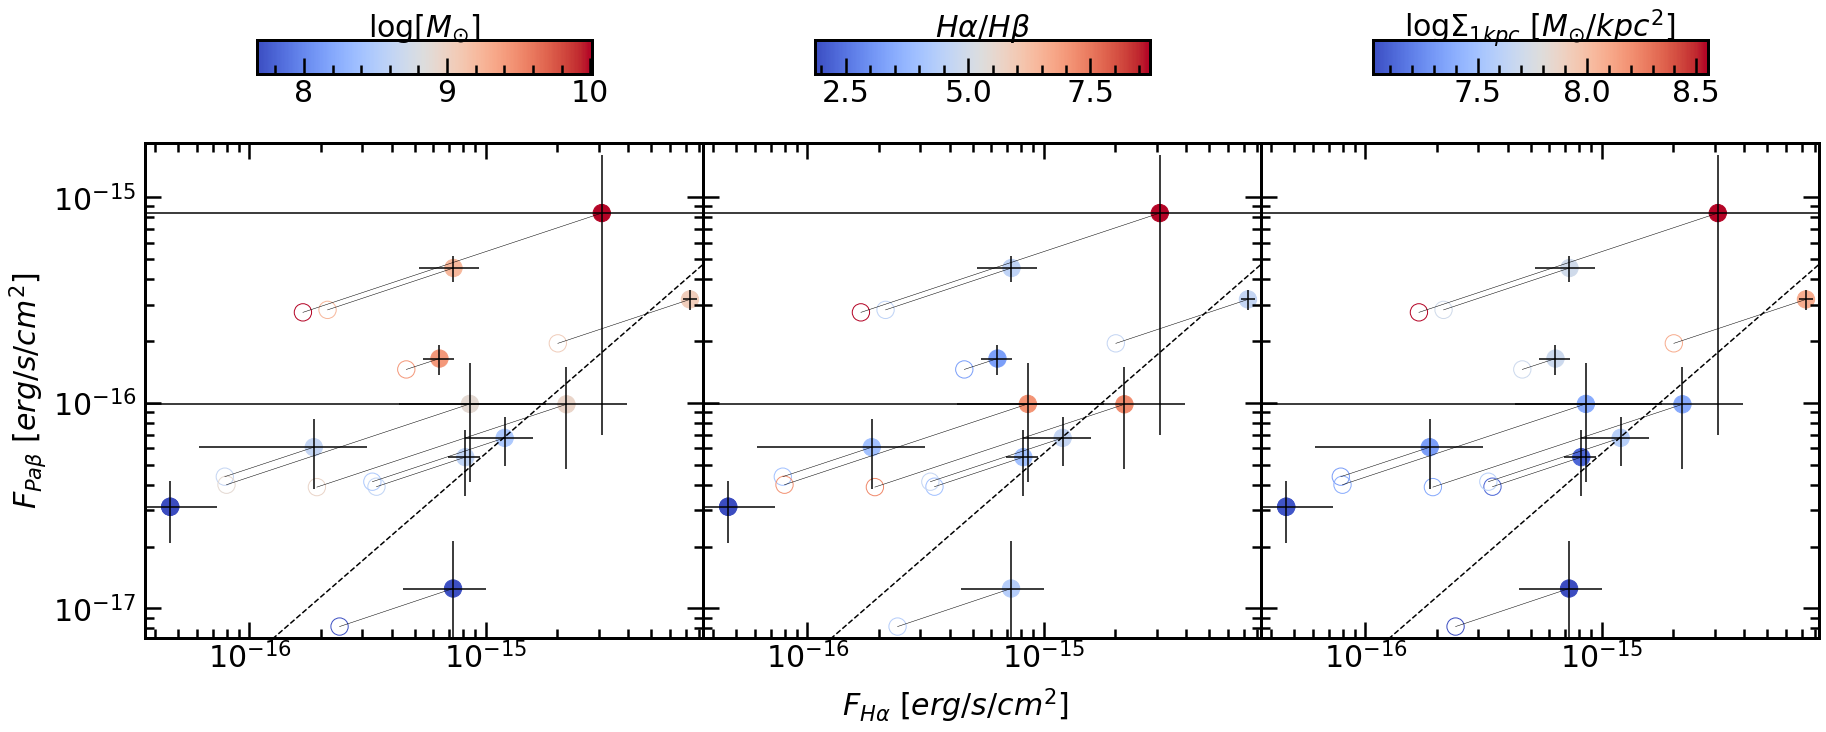

In [11]:
xha = np.linspace(10**-17 , 10**-14 , num = 10000)
yha = xha/17.6

fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$F_{Pa\beta}$ [$erg/s/cm^2$]")
y0 = ax0.scatter(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER']  , s = 300 , c = dcmergedf['td_lmass'] , cmap= 'coolwarm')
scatterdots0 = ax0.scatter(dcmergedf['HA_FLUX'] , dcmergedf['PAB_FLUX'] , s=300, c=dcmergedf['td_lmass'] , cmap='coolwarm')
scatterdots0.set_facecolor('none') 
ax0.errorbar(dcmergedf['HA_FLUX_DC_BALMER']  , dcmergedf['PAB_FLUX_DC_BALMER']  , xerr = dcmergedf['HA_FLUX_DC_BALMER_ERR']  , yerr = dcmergedf['PAB_FLUX_DC_BALMER_ERR']  ,c = 'black' , linestyle = 'None')
ax0.plot(xha , yha , '--' ,  c = 'black')
ax0.axis([min(dcmergedf['HA_FLUX_DC_BALMER'])-10**-17  , max(dcmergedf['HA_FLUX_DC_BALMER'])+ 10**-15 , min(dcmergedf['PAB_FLUX']) - 10**-18 , max(dcmergedf['PAB_FLUX_DC_BALMER']) + 10**-15])
ax0.set_yscale('log')
ax0.set_xscale('log')
for i in range(len(dcmergedf)):
    ax0.plot([dcmergedf['HA_FLUX'].iloc[i] , dcmergedf['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedf['PAB_FLUX'].iloc[i] , dcmergedf['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
 
ax1 = fig.add_subplot(gs[2:12, 5:10])                                                                                      
y1 = ax1.scatter(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap= 'coolwarm')
scatterdots1 = ax1.scatter(dcmergedf['HA_FLUX'], dcmergedf['PAB_FLUX'], s=300, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
scatterdots1.set_facecolor('none')
ax1.errorbar(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER'] , xerr = dcmergedf['HA_FLUX_DC_BALMER_ERR'] , yerr = dcmergedf['PAB_FLUX_DC_BALMER_ERR'] ,c = 'black' , linestyle = 'None')
ax1.plot(xha , yha , '--' ,  c = 'black')
ax1.axis([min(dcmergedf['HA_FLUX_DC_BALMER'])-10**-17  , max(dcmergedf['HA_FLUX_DC_BALMER'])+ 10**-15 , min(dcmergedf['PAB_FLUX']) - 10**-18 , max(dcmergedf['PAB_FLUX_DC_BALMER']) + 10**-15])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.tick_params(labelleft = False)
for i in range(len(dcmergedf)):
    ax1.plot([dcmergedf['HA_FLUX'].iloc[i] , dcmergedf['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedf['PAB_FLUX'].iloc[i] , dcmergedf['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
                                                                                            
ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER']  , s = 300 , c = dcmergedf['SIGMA_1'] , cmap= 'coolwarm')
scatterdots2 = ax2.scatter(dcmergedf['HA_FLUX'], dcmergedf['PAB_FLUX'], s=300, c=dcmergedf['SIGMA_1'], cmap='coolwarm')
scatterdots2.set_facecolor('none') 
ax2.errorbar(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER'] , xerr = dcmergedf['HA_FLUX_DC_BALMER_ERR'] , yerr = dcmergedf['PAB_FLUX_DC_BALMER_ERR'] ,c = 'black' , linestyle = 'None')
ax2.plot(xha , yha , '--' ,  c = 'black')
ax2.axis([min(dcmergedf['HA_FLUX_DC_BALMER'])-10**-17  , max(dcmergedf['HA_FLUX_DC_BALMER'])+ 10**-15 , min(dcmergedf['PAB_FLUX']) - 10**-18 , max(dcmergedf['PAB_FLUX_DC_BALMER']) + 10**-15])
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.tick_params(labelleft = False)
for i in range(len(dcmergedf)):
    ax2.plot([dcmergedf['HA_FLUX'].iloc[i] , dcmergedf['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedf['PAB_FLUX'].iloc[i] , dcmergedf['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
    

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$[M_{\odot}]$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label =  r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
ax5.xaxis.set_label_position('top')

fig.text(0.5,0.04, r"$F_{H\alpha}$ [$erg/s/cm^2$]", ha="center", va="center")
plt.show()

In [10]:
lmmassbalmer = linmix.LinMix(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS_DC_BALMER'], [.3]* len(dcmergedf['td_lmass']), dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], K = 2, seed = 2)
lmmassbalmer.run_mcmc(silent = True) 

lmbalmerbalmer = linmix.LinMix(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX']  , dcmergedf['PABHA_EXCESS_DC_BALMER'], dcmergedf['BALMER_ERR'], dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], K = 2, seed = 2)
lmbalmerbalmer.run_mcmc(silent = True) 

lmbalmersigma = linmix.LinMix(dcmergedf['SIGMA_1']  , dcmergedf['PABHA_EXCESS_DC_BALMER'], [.3]* len(dcmergedf['SIGMA_1']), dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], K = 2, seed = 2)
lmbalmersigma.run_mcmc(silent = True) 

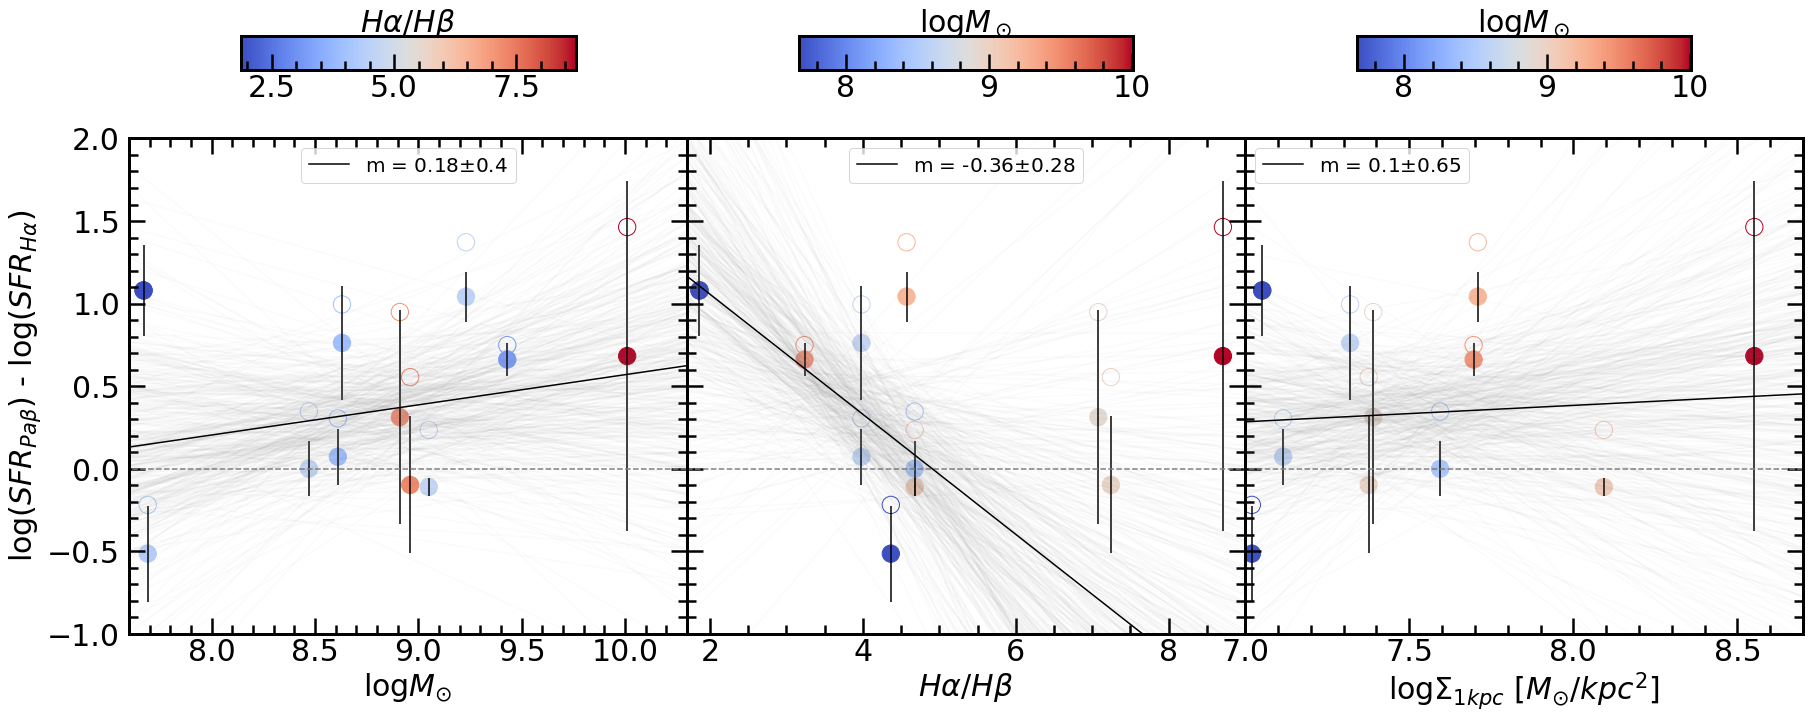

In [51]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_xlabel(r"log$M_{\odot}$")
y0 = ax0.scatter(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS_DC_BALMER']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')
ax0.errorbar(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS_DC_BALMER']  , yerr = dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], c = 'black' , linestyle = 'None')
scatterdots0 = ax0.scatter(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')
scatterdots0.set_facecolor('none')
ax0.plot([7 , 10.5] , [0 , 0] , '--' , c = 'gray')
ax0.axis([7.6 , 10.3 , -1 , 2])
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{H\alpha}$)')
# for i in range(len(dcmergedf)):
#     ax0.plot([dcmergedf['td_lmass'].iloc[i] , dcmergedf['td_lmass'].iloc[i]] , [dcmergedf['PABHA_EXCESS'].iloc[i] , dcmergedf['PABHA_EXCESS_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
for i in range(0, len(lmmassbalmer.chain), 25):
    xs = np.arange(6,12)
    ys = lmmassbalmer.chain[i]['alpha'] + xs * lmmassbalmer.chain[i]['beta']
    ax0.plot(xs, ys, color='gray', alpha=0.03)
ax0.plot([6.5 , 10.5] , [np.mean(lmmassbalmer.chain['alpha']) + np.mean(lmmassbalmer.chain['beta'])*6.5 , np.mean(lmmassbalmer.chain['alpha']) + np.mean(lmmassbalmer.chain['beta'])*10.5] , c = 'black' , label = 'm = ' + str(round(np.mean(lmmassbalmer.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmmassbalmer.chain['beta']), 2))  )
ax0.legend()

ax1 = fig.add_subplot(gs[2:12, 5:10])  
ax1.set_xlabel(r"$H\alpha/H\beta$")
y1 = ax1.scatter(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX']  , dcmergedf['PABHA_EXCESS_DC_BALMER']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'coolwarm')
scatterdots1 = ax1.scatter(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , dcmergedf['PABHA_EXCESS']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'coolwarm')
scatterdots1.set_facecolor('none')
ax1.errorbar(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , dcmergedf['PABHA_EXCESS_DC_BALMER']  , yerr = dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], c = 'black' , linestyle = 'None')
ax1.plot([1.7 , 9] , [0 , 0] , '--' , c = 'gray')
ax1.axis([1.7 , 9 , -1 , 2])
ax1.tick_params(labelleft = False)
# for i in range(len(dcmergedf)):
#     ax1.plot([dcmergedf['HA_FLUX'].iloc[i]/dcmergedf['HB_FLUX'].iloc[i] , dcmergedf['HA_FLUX'].iloc[i]/dcmergedf['HB_FLUX'].iloc[i]] , [dcmergedf['PABHA_EXCESS'].iloc[i] , dcmergedf['PABHA_EXCESS_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
for i in range(0, len(lmbalmerbalmer.chain), 25):
    xs = np.arange(1,10)
    ys = lmbalmerbalmer.chain[i]['alpha'] + xs * lmbalmerbalmer.chain[i]['beta']
    ax1.plot(xs, ys, color='gray', alpha=0.03)
ax1.plot([1 , 10] , [np.mean(lmbalmerbalmer.chain['alpha']) + np.mean(lmbalmerbalmer.chain['beta'])*1 , np.mean(lmbalmerbalmer.chain['alpha']) + np.mean(lmbalmerbalmer.chain['beta'])*10] , c = 'black' , label = 'm = ' + str(round(np.mean(lmbalmerbalmer.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmbalmerbalmer.chain['beta']), 2))  )
ax1.legend()    

ax2 = fig.add_subplot(gs[2:12, 10:15])
ax2.set_xlabel(r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
y2 = ax2.scatter(dcmergedf['SIGMA_1']  , dcmergedf['PABHA_EXCESS_DC_BALMER']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'coolwarm')
ax2.errorbar(dcmergedf['SIGMA_1'] , dcmergedf['PABHA_EXCESS_DC_BALMER']  , yerr = dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], c = 'black' , linestyle = 'None')
scatterdots2 = ax2.scatter(dcmergedf['SIGMA_1']  , dcmergedf['PABHA_EXCESS']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'coolwarm')
scatterdots2.set_facecolor('none')
ax2.plot([5 , 10] , [0 , 0] , '--' , c = 'gray')
ax2.axis([7 , 8.7 , -1, 2])
ax2.tick_params(labelleft = False)
# for i in range(len(dcmergedf)):
#     ax2.plot([dcmergedf['gf_n_j'].iloc[i] ,dcmergedf['gf_n_j'].iloc[i]] , [dcmergedf['PABHA_EXCESS'].iloc[i] , dcmergedf['PABHA_EXCESS_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
for i in range(0, len(lmbalmersigma.chain), 25):
    xs = np.arange(1,10)
    ys = lmbalmersigma.chain[i]['alpha'] + xs * lmbalmersigma.chain[i]['beta']
    ax2.plot(xs, ys, color='gray', alpha=0.03)
ax2.plot([1 , 10] , [np.mean(lmbalmersigma.chain['alpha']) + np.mean(lmbalmersigma.chain['beta'])*1 , np.mean(lmbalmersigma.chain['alpha']) + np.mean(lmbalmersigma.chain['beta'])*10] , c = 'black' , label = 'm = ' + str(round(np.mean(lmbalmersigma.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmbalmersigma.chain['beta']), 2))  )
ax2.legend()    
            
                                                                                    
ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_\odot$')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_\odot$')
ax5.xaxis.set_label_position('top')

#fig.text(0.5,0.04, r"$F_{H\alpha}$ [$erg/s/cm^2$]", ha="center", va="center")
plt.show()

In [63]:
display(lmmassbalmer.chain['sigsqr'].mean())
display(lmbalmerbalmer.chain['sigsqr'].mean())
display(lmbalmersigma.chain['sigsqr'].mean())

0.5376089486937672

0.3522635314774011

0.5413494516742717

In [39]:
lmpabhaav = linmix.LinMix(dcmergedf['td_Av'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], [.3]* len(dcmergedf['td_Av']), dcmergedf['PABHA_ERR'], K = 2, seed = 2)
lmpabhaav.run_mcmc(silent = True) 

lmpabhabeta = linmix.LinMix(dcmergedf['ir_UV_beta'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], [.3]* len(dcmergedf['ir_UV_beta']), dcmergedf['PABHA_ERR'], K = 2, seed = 2)
lmpabhabeta.run_mcmc(silent = True) 

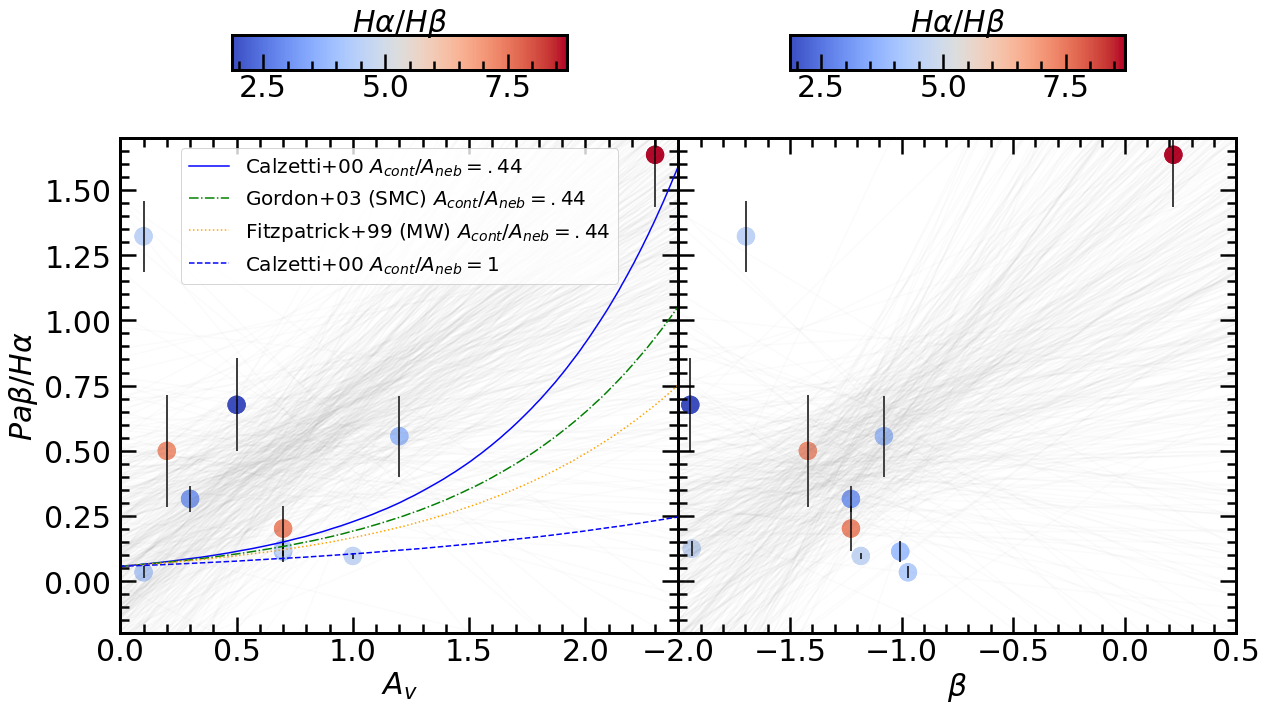

In [58]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$Pa\beta/H\alpha$")
ax0.set_xlabel(r"$A_v$")
y0 = ax0.scatter(dcmergedf['td_Av'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=300, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
ax0.errorbar(dcmergedf['td_Av'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , yerr = dcmergedf['PABHA_ERR'], c = 'black' , linestyle = 'None')
scatterdots0 = ax0.scatter(dcmergedf['td_Av'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')

# ax0.scatter(dustcurvesdf['AV_FITZ99'] , dustcurvesdf['PABHA_FITZ99'] , s = 30, c = 'orange' , marker = '+' , label = 'Fitzpatrick+ 99')
# ax0.scatter(dustcurvesdf['AV_GORD03'] , dustcurvesdf['PABHA_GORD03'] , s = 30, c = 'green' , marker = '+' , label = 'Gordon+ 03')
ax0.plot(dustcurvesdf['AV_CALZ00']*.44 , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , label = r'Calzetti+00 $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_GORD03']*.44 , dustcurvesdf['PABHA_GORD03'] , c = 'green' , linestyle = '-.' , label = r'Gordon+03 (SMC) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_FITZ99']*.44 , dustcurvesdf['PABHA_FITZ99'] , c = 'orange' , linestyle = ':' , label = r'Fitzpatrick+99 (MW) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_CALZ00'] , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , linestyle = '--' , label = r'Calzetti+00 $A_{cont}/A_{neb} = 1$')
scatterdots0.set_facecolor('none')
# ax0.set_xscale('log')
#ax0.set_yscale('log')
for i in range(0, len(lmpabhaav.chain), 25):
    xs = np.arange(0,4)
    ys = lmpabhaav.chain[i]['alpha'] + xs * lmpabhaav.chain[i]['beta']
    ax0.plot(xs, ys, color='gray', alpha=0.03)
#ax0.plot([0 , 4] , [np.mean(lmpabhaav.chain['alpha']) + np.mean(lmpabhaav.chain['beta'])*0 , np.mean(lmpabhaav.chain['alpha']) + np.mean(lmpabhaav.chain['beta'])*4] , c = 'black' , label = 'm = ' + str(round(np.mean(lmpabhaav.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmpabhaav.chain['beta']), 2))  )
ax0.legend(loc = 9)  
ax0.axis([0 , 2.4 , -.2 , 1.7])

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$\beta$")
y1 = ax1.scatter(dcmergedf['ir_UV_beta'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=300, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
ax1.errorbar(dcmergedf['ir_UV_beta'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , yerr = dcmergedf['PABHA_ERR'], c = 'black' , linestyle = 'None')
scatterdots1 = ax1.scatter(dcmergedf['ir_UV_beta'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')
scatterdots1.set_facecolor('none')
ax1.tick_params(labelleft = False)
#ax1.set_xscale('log')
#ax1.set_yscale('log')
for i in range(0, len(lmpabhabeta.chain), 25):
    xs = np.arange(-2,2)
    ys = lmpabhabeta.chain[i]['alpha'] + xs * lmpabhabeta.chain[i]['beta']
    ax1.plot(xs, ys, color='gray', alpha=0.03)
#ax1.plot([-2 , 2] , [np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*-2 , np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*2] , c = 'black' , label = 'm = ' + str(round(np.mean(lmpabhabeta.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmpabhabeta.chain['beta']), 2))  )
#ax1.legend(loc = 'upper left')
ax1.axis([-2 , .5 , -.2 , 1.7])
ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax4.xaxis.set_label_position('top')

plt.show()

In [6]:
display(dcmergedf)

,FIELD_x,ID,RA_x,DEC_x,Z_50,Z_ERR,PAB_FLUX,PAB_FLUX_ERR,OBS_PAB,id3DHST,...,HA_SFR_DC_BALMER,HA_SFR_DC_BALMER_ERR,PAB_SFR_DC_BALMER,PAB_SFR_DC_BALMER_ERR,PABHA_EXCESS_DC_BALMER,PABHA_EXCESS_DC_BALMER_ERR,BALMER_ERR,PABHA_ERR,BALMER_DC_ERR,PABHA_DC_ERR
0,GN1,37683,189.306089,62.360350,0.277481,0.001144,3.907847e-17,1.367054e-17,16377.307364,37683,...,0.035738,0.068973,0.108584,0.153974,0.072846,0.168717,0.237763,0.039843,0.780946,0.025853
1,GN2,19221,189.201266,62.240702,0.139631,0.002470,1.944551e-16,2.126779e-17,14610.064284,19221,...,0.318804,0.028993,0.208503,0.048723,-0.110300,0.056696,0.118504,0.010594,0.330869,0.005699
2,GN2,15610,189.212722,62.222423,0.199242,0.007588,1.452055e-16,2.317139e-17,15374.278308,15610,...,-0.399629,0.064759,0.261758,0.073568,0.661387,0.098010,0.182237,0.050905,0.738870,0.058233
3,GN2,18157,189.182293,62.232458,0.196814,0.027064,3.889960e-17,1.627647e-17,15343.154062,18157,...,0.125454,0.348785,0.027563,0.224726,-0.097891,0.414913,2.216177,0.086086,3.999213,0.042912
4,GN3,34456,189.339813,62.324291,0.224320,0.010113,8.541566e-16,2.751076e-17,15695.781592,34456,...,0.629005,1.037948,1.311253,0.236094,0.682248,1.064461,7.948358,0.414628,11.954053,0.692906
5,GN3,34157,189.206826,62.321196,0.245119,0.014142,2.828275e-16,2.688524e-17,15962.430241,34157,...,-0.224653,0.123830,0.817758,0.076183,1.042411,0.145388,0.492984,0.136513,1.413779,0.198045
6,GN3,33511,189.234550,62.314768,0.256401,0.009254,4.371808e-17,1.187729e-17,16107.064381,33511,...,-0.728277,0.292428,0.033785,0.179530,0.762062,0.343140,1.022796,0.154941,3.362750,0.250458
7,GN3,34368,189.338526,62.320968,0.228424,0.005207,4.132371e-17,9.957366e-18,15748.400334,34368,...,0.123587,0.139242,0.123710,0.090004,0.000123,0.165798,0.572523,0.030346,1.602059,0.023574
8,GN3,35455,189.332074,62.328669,0.205959,0.153672,8.165377e-18,5.576698e-18,15460.389849,35455,...,-0.208651,0.166187,-0.722678,0.238975,-0.514027,0.291080,0.630487,0.023297,1.890670,0.013665
9,GN4,24611,189.359058,62.264140,0.262365,0.015258,3.994653e-17,1.638382e-17,16183.517689,24611,...,-0.238869,0.475116,0.073482,0.438178,0.312351,0.646324,2.942129,0.214264,5.438410,0.143210


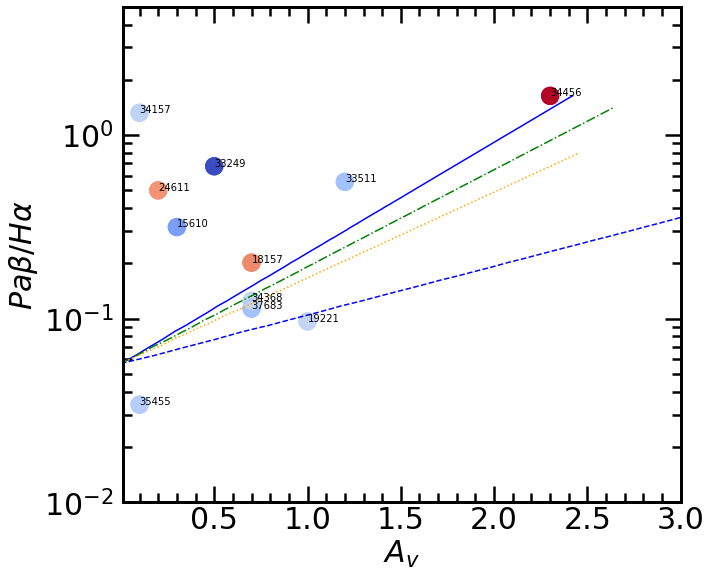

In [11]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$Pa\beta/H\alpha$")
ax0.set_xlabel(r"$A_v$")
y0 = ax0.scatter(dcmergedf['td_Av'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=300, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
#ax0.errorbar(dcmergedf['td_Av'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , yerr = dcmergedf['PABHA_ERR'], c = 'black' , linestyle = 'None')
for i in range(len(dcmergedf)):
    ax0.annotate(str(dcmergedf['ID'].iloc[i]) , xy = (dcmergedf['td_Av'].iloc[i], dcmergedf['PAB_FLUX'].iloc[i]/dcmergedf['HA_FLUX'].iloc[i]) , size = 10)
scatterdots0 = ax0.scatter(dcmergedf['td_Av'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')
ax0.plot(dustcurvesdf['AV_CALZ00']*.44 , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , label = r'Calzetti+00 $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_GORD03']*.44 , dustcurvesdf['PABHA_GORD03'] , c = 'green' , linestyle = '-.' , label = r'Gordon+03 (SMC) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_FITZ99']*.44 , dustcurvesdf['PABHA_FITZ99'] , c = 'orange' , linestyle = ':' , label = r'Fitzpatrick+99 (MW) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_CALZ00'] , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , linestyle = '--' , label = r'Calzetti+00 $A_{cont}/A_{neb} = 1$')
scatterdots0.set_facecolor('none')
# ax0.set_xscale('log')
ax0.set_yscale('log')
# for i in range(0, len(lmpabhaav.chain), 25):
#     xs = np.arange(0,4)
#     ys = lmpabhaav.chain[i]['alpha'] + xs * lmpabhaav.chain[i]['beta']
#     ax0.plot(xs, ys, color='gray', alpha=0.03)
# ax0.plot([0 , 4] , [np.mean(lmpabhaav.chain['alpha']) + np.mean(lmpabhaav.chain['beta'])*0 , np.mean(lmpabhaav.chain['alpha']) + np.mean(lmpabhaav.chain['beta'])*4] , c = 'black' , label = 'm = ' + str(round(np.mean(lmpabhaav.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmpabhaav.chain['beta']), 2))  )
#ax0.legend(loc = 9)  
ax0.axis([0.01 , 3 , .01 , 5])



# ax3 = fig.add_subplot(gs[0:1,1:4])
# fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
# ax3.xaxis.set_label_position('top')
plt.show()

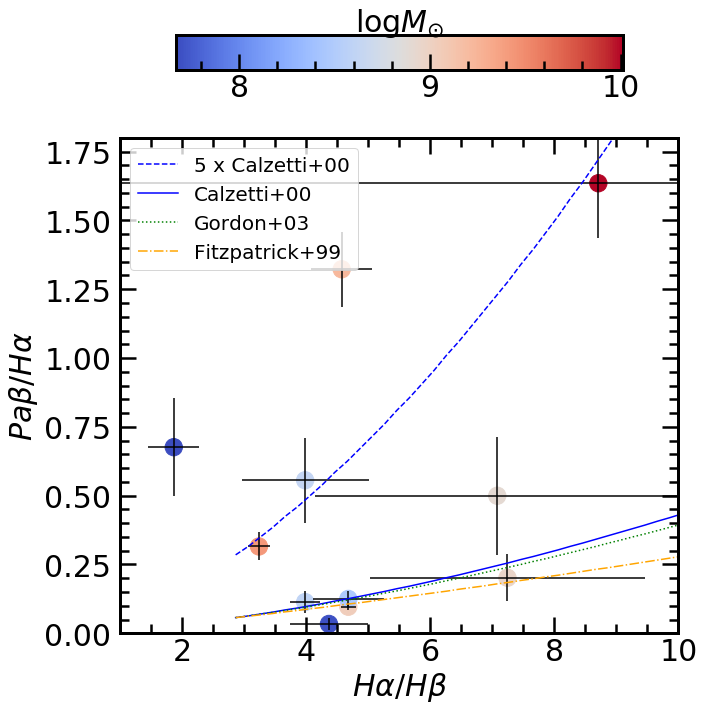

In [18]:
fig = plt.figure(figsize = (10 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:10])
ax0.set_ylabel(r"$Pa\beta/H\alpha$")
ax0.set_xlabel(r"$H\alpha/H\beta$")
y0 = ax0.scatter(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=300, c = dcmergedf['td_lmass'], cmap='coolwarm')
ax0.errorbar(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , xerr = dcmergedf['BALMER_ERR'] , yerr = dcmergedf['PABHA_ERR'], c = 'black' , linestyle = 'None')
ax0.plot(dustcurvesdf['HAHB'] , dustcurvesdf['PABHA_CALZ00']*5 , c = 'blue' , label = '5 x Calzetti+00' , linestyle = '--')
ax0.plot(dustcurvesdf['HAHB'] , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , label = 'Calzetti+00')

ax0.plot(dustcurvesdf['HAHB'] , dustcurvesdf['PABHA_GORD03'] , c = 'green' , linestyle = ':' , label = 'Gordon+03')
ax0.plot(dustcurvesdf['HAHB'] , dustcurvesdf['PABHA_FITZ99'] , c = 'orange' , linestyle = '-.' , label = 'Fitzpatrick+99')

ax0.axis([1 , 10 , 0 , 1.8])
ax0.legend(loc = 'upper left')
ax3 = fig.add_subplot(gs[0:1,1:9])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_{\odot}$')
ax3.xaxis.set_label_position('top')

C:\Users\nikko\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


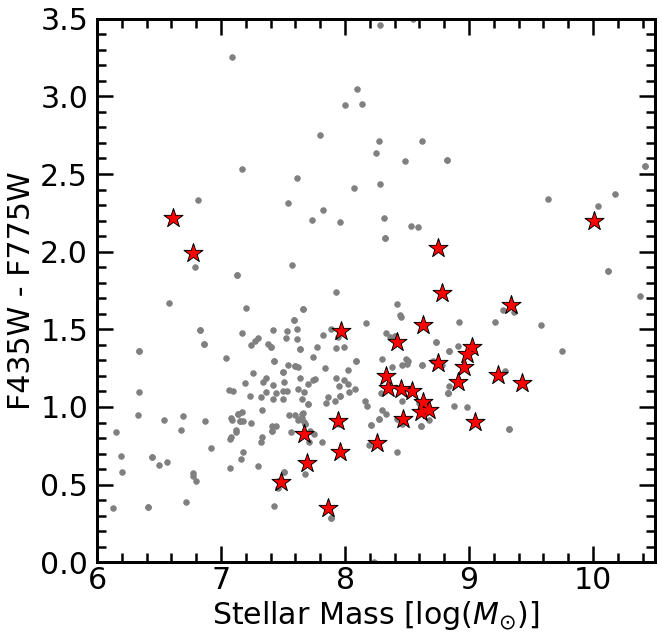

In [11]:
plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 30})
plt.scatter(fullcleardf['td_lmass'] , -2.5*np.log10(fullcleardf['ACS_F435W_FLUX']/fullcleardf['ACS_F775W_FLUX']) , s = 30 , c = 'gray')
plt.scatter(fullmergedf['td_lmass'] , -2.5*np.log10(fullmergedf['ACS_F435W_FLUX']/fullmergedf['ACS_F775W_FLUX']) , s = 400 , c = 'black' , marker = '*')
plt.scatter(fullmergedf['td_lmass'] , -2.5*np.log10(fullmergedf['ACS_F435W_FLUX']/fullmergedf['ACS_F775W_FLUX']) , s = 200 , c = 'red' , marker = '*')
plt.ylabel("F435W - F775W")
plt.xlabel("Stellar Mass [log($M_{\odot})]$")
plt.axis([6 , 10.5  ,  0 , 3.5])
#plt.grid()
#plt.xscale('log')
#plt.yscale('log')

# plt.figure(figsize = (10,10))
# plt.rcParams.update({'font.size': 30})
# plt.scatter(fullcleardf['td_lmass'] , fullcleardf['restalt_restUjohnson'] - fullcleardf['restalt_restVjohnson'] , s = 30 , c = 'gray')
# plt.scatter(fullmergedf['td_lmass'] , fullmergedf['restalt_restUjohnson'] - fullmergedf['restalt_restVjohnson'] , s = 400 , c = 'black' , marker = '*')
# plt.scatter(fullmergedf['td_lmass'] , fullmergedf['restalt_restUjohnson'] - fullmergedf['restalt_restVjohnson'] , s = 200 , c = 'red' , marker = '*')
# plt.ylabel("(U - V) Rest")
# plt.xlabel("Stelar Mass log($M_{\odot})$")
plt.show()

In [17]:
lmlimitall = linmix.LinMix(limitdf['td_lmass'] ,limitdf['PAB_SFR_EXCESS_LIMIT_RAND'] , [.3]*len(limitdf['td_lmass']) , [.3]*len(limitdf['td_lmass']) , K = 2, seed = 2)
lmlimitall.run_mcmc(silent = True)

In [18]:
lmlimitbetaneg = linmix.LinMix(limitbetanegdf['td_lmass'] , limitbetanegdf['PAB_SFR_EXCESS_LIMIT_RAND'] , [.3]*len(limitbetanegdf['td_lmass']) , [.3]*len(limitbetanegdf['td_lmass']) , K = 2, seed = 2)
lmlimitbetaneg.run_mcmc(silent = True)

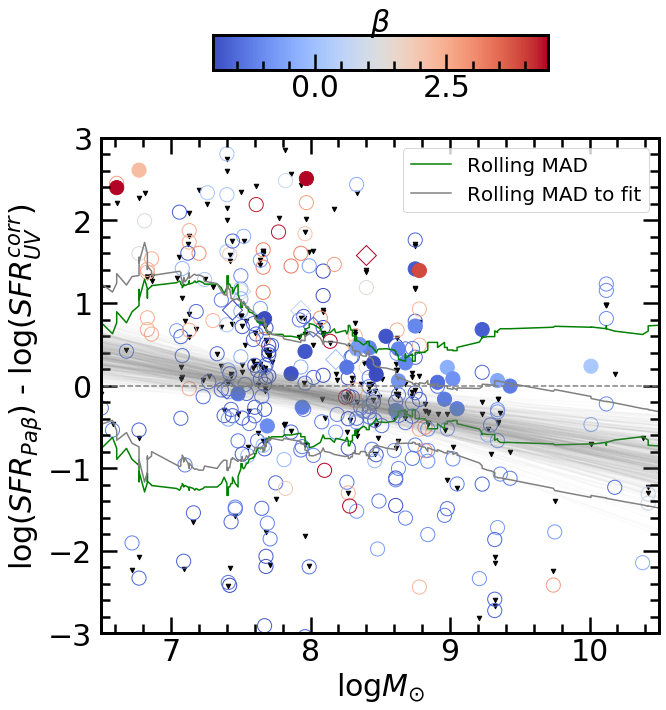

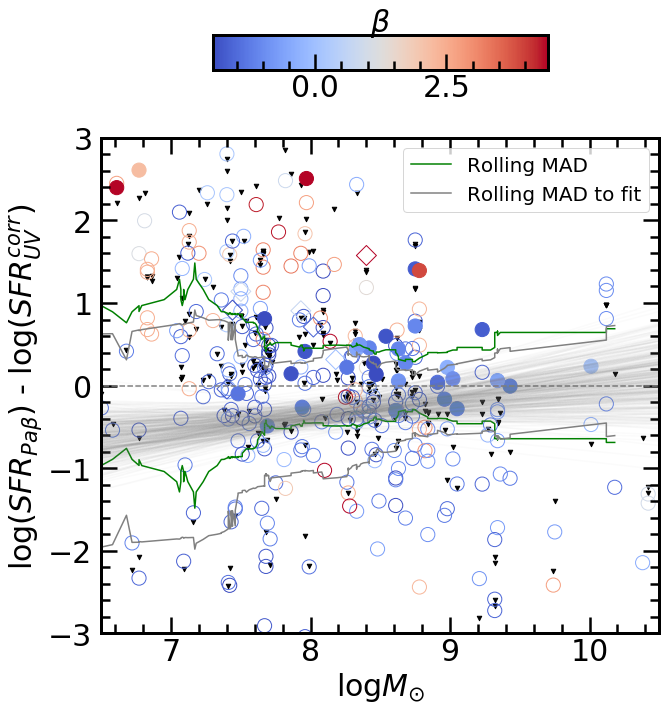

In [28]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])

#ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 200 , marker = '+' , c = 'black')
#ax0.errorbar(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
#ax0.scatter(fullcleardf['td_lmass'] , fullcleardf['PAB_SFR_EX2_LIMIT'] , s = 20, c = 'black')
ax0.scatter(sortedclearmergedf['td_lmass'] , sortedclearmergedf['PAB_SFR_EX2_LIMIT'] , s = 20, c = 'black' , marker = 'v')
scatterdots0 = ax0.scatter(sortedclearmergedf['td_lmass'] , sortedclearmergedf['PAB_SFR_EX2_LIMIT_RAND'] , s = 200, c = sortedclearmergedf['ir_UV_beta'] , cmap = 'coolwarm')
scatterdots0.set_facecolor('none')
scatter0 = ax0.scatter(fullmergebaddf['td_lmass'] , fullmergebaddf['PAB_SFR_EX2'] , s = 200, c = fullmergebaddf['ir_UV_beta'] , cmap = 'coolwarm' , marker = 'D')
scatter0.set_facecolor('none')
y0 = ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['ir_UV_beta'] , cmap = 'coolwarm')
ax0.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD'] , c = 'green' , label = 'Rolling MAD')
ax0.plot(limitdf['td_lmass'] , -limitdf['ROLL_MAD'] , c = 'green')
ax0.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT_TOP'] , c = 'gray' , label = 'Rolling MAD to fit')
ax0.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT_BOT'] , c = 'gray')
#ax0.scatter(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT_BETA_NEG'] , c = 'blue' , label = 'Rolling MAD to beta < 0')
ax0.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel(r"log$M_{\odot}$")
ax0.axis([6.5 , 10.5 , -3 , 3])
for i in range(0, len(lmlimitall.chain), 25):
    xs = np.arange(-6,12)
    ys = lmlimitall.chain[i]['alpha'] + xs * lmlimitall.chain[i]['beta']
    ax0.plot(xs, ys, color='gray', alpha=0.03)
#ax1.plot([-2 , 2] , [np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*-2 , np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*2] , c = 'black' , label = 'm = ' + str(round(np.mean(lmpabhabeta.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmpabhabeta.chain['beta']), 2))  )
ax0.legend()

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$\beta$')
ax3.xaxis.set_label_position('top')

plt.show()

fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])

#ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 200 , marker = '+' , c = 'black')
#ax0.errorbar(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
#ax0.scatter(fullcleardf['td_lmass'] , fullcleardf['PAB_SFR_EX2_LIMIT'] , s = 20, c = 'black')
ax0.scatter(sortedclearmergedf['td_lmass'] , sortedclearmergedf['PAB_SFR_EX2_LIMIT'] , s = 20, c = 'black' , marker = 'v')
scatterdots0 = ax0.scatter(sortedclearmergedf['td_lmass'] , sortedclearmergedf['PAB_SFR_EX2_LIMIT_RAND'] , s = 200, c = sortedclearmergedf['ir_UV_beta'] , cmap = 'coolwarm')
scatterdots0.set_facecolor('none')
scatter0 = ax0.scatter(fullmergebaddf['td_lmass'] , fullmergebaddf['PAB_SFR_EX2'] , s = 200, c = fullmergebaddf['ir_UV_beta'] , cmap = 'coolwarm' , marker = 'D')
scatter0.set_facecolor('none')
y0 = ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['ir_UV_beta'] , cmap = 'coolwarm')
ax0.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD'] , c = 'green' , label = 'Rolling MAD')
ax0.plot(limitbetanegdf['td_lmass'] , -limitbetanegdf['ROLL_MAD'] , c = 'green')
ax0.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT_TOP'] , c = 'gray' , label = 'Rolling MAD to fit')
ax0.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT_BOT'] , c = 'gray')
#ax0.scatter(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT_BETA_NEG'] , c = 'blue' , label = 'Rolling MAD to beta < 0')
ax0.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel(r"log$M_{\odot}$")
ax0.axis([6.5 , 10.5 , -3 , 3])
for i in range(0, len(lmlimitbetaneg.chain), 25):
    xs = np.arange(-6,12)
    ys = lmlimitbetaneg.chain[i]['alpha'] + xs * lmlimitbetaneg.chain[i]['beta']
    ax0.plot(xs, ys, color='gray', alpha=0.03)
#ax1.plot([-2 , 2] , [np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*-2 , np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*2] , c = 'black' , label = 'm = ' + str(round(np.mean(lmpabhabeta.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmpabhabeta.chain['beta']), 2))  )
ax0.legend()

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$\beta$')
ax3.xaxis.set_label_position('top')

plt.show()

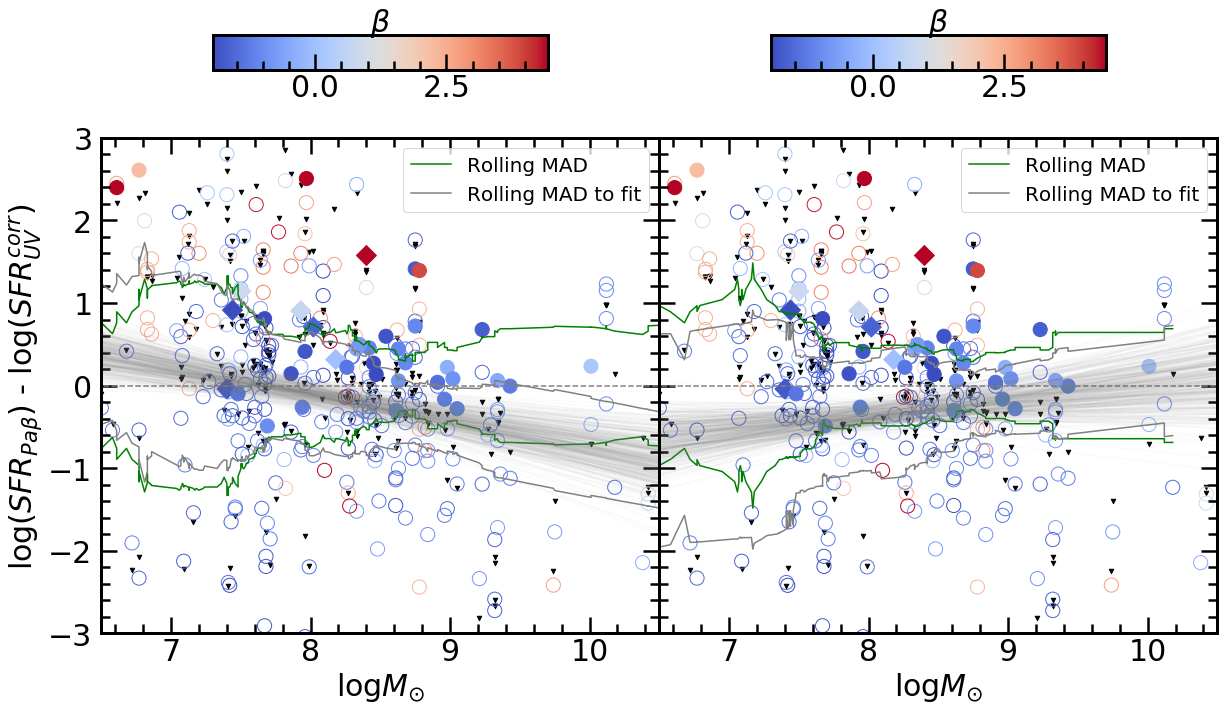

In [30]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])

#ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 200 , marker = '+' , c = 'black')
#ax0.errorbar(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
#ax0.scatter(fullcleardf['td_lmass'] , fullcleardf['PAB_SFR_EX2_LIMIT'] , s = 20, c = 'black')
ax0.scatter(sortedclearmergedf['td_lmass'] , sortedclearmergedf['PAB_SFR_EX2_LIMIT'] , s = 20, c = 'black' , marker = 'v')
scatterdots0 = ax0.scatter(sortedclearmergedf['td_lmass'] , sortedclearmergedf['PAB_SFR_EX2_LIMIT_RAND'] , s = 200, c = sortedclearmergedf['ir_UV_beta'] , cmap = 'coolwarm')
scatterdots0.set_facecolor('none')
scatter0 = ax0.scatter(fullmergebaddf['td_lmass'] , fullmergebaddf['PAB_SFR_EX2'] , s = 200, c = fullmergebaddf['ir_UV_beta'] , cmap = 'coolwarm' , marker = 'D')
#scatter0.set_facecolor('none')
y0 = ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['ir_UV_beta'] , cmap = 'coolwarm')
ax0.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD'] , c = 'green' , label = 'Rolling MAD')
ax0.plot(limitdf['td_lmass'] , -limitdf['ROLL_MAD'] , c = 'green')
ax0.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT_TOP'] , c = 'gray' , label = 'Rolling MAD to fit')
ax0.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT_BOT'] , c = 'gray')
#ax0.scatter(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT_BETA_NEG'] , c = 'blue' , label = 'Rolling MAD to beta < 0')
ax0.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel(r"log$M_{\odot}$")
ax0.axis([6.5 , 10.5 , -3 , 3])
for i in range(0, len(lmlimitall.chain), 25):
    xs = np.arange(-6,12)
    ys = lmlimitall.chain[i]['alpha'] + xs * lmlimitall.chain[i]['beta']
    ax0.plot(xs, ys, color='gray', alpha=0.03)
#ax1.plot([-2 , 2] , [np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*-2 , np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*2] , c = 'black' , label = 'm = ' + str(round(np.mean(lmpabhabeta.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmpabhabeta.chain['beta']), 2))  )
ax0.legend()

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$\beta$')
ax3.xaxis.set_label_position('top')

ax1 = fig.add_subplot(gs[2:12, 5:10])

#ax1.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 200 , marker = '+' , c = 'black')
#ax1.errorbar(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
#ax1.scatter(fullcleardf['td_lmass'] , fullcleardf['PAB_SFR_EX2_LIMIT'] , s = 20, c = 'black')
ax1.scatter(sortedclearmergedf['td_lmass'] , sortedclearmergedf['PAB_SFR_EX2_LIMIT'] , s = 20, c = 'black' , marker = 'v')
scatterdots1 = ax1.scatter(sortedclearmergedf['td_lmass'] , sortedclearmergedf['PAB_SFR_EX2_LIMIT_RAND'] , s = 200, c = sortedclearmergedf['ir_UV_beta'] , cmap = 'coolwarm')
scatterdots1.set_facecolor('none')
scatter1 = ax1.scatter(fullmergebaddf['td_lmass'] , fullmergebaddf['PAB_SFR_EX2'] , s = 200, c = fullmergebaddf['ir_UV_beta'] , cmap = 'coolwarm' , marker = 'D')
#scatter1.set_facecolor('none')
y1 = ax1.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['ir_UV_beta'] , cmap = 'coolwarm')
ax1.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD'] , c = 'green' , label = 'Rolling MAD')
ax1.plot(limitbetanegdf['td_lmass'] , -limitbetanegdf['ROLL_MAD'] , c = 'green')
ax1.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT_TOP'] , c = 'gray' , label = 'Rolling MAD to fit')
ax1.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT_BOT'] , c = 'gray')
#ax1.scatter(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT_BETA_NEG'] , c = 'blue' , label = 'Rolling MAD to beta < 0')
ax1.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
#ax1.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax1.set_xlabel(r"log$M_{\odot}$")
ax1.axis([6.5 , 10.5 , -3 , 3])
for i in range(0, len(lmlimitbetaneg.chain), 25):
    xs = np.arange(-6,12)
    ys = lmlimitbetaneg.chain[i]['alpha'] + xs * lmlimitbetaneg.chain[i]['beta']
    ax1.plot(xs, ys, color='gray', alpha=0.03)
#ax1.plot([-2 , 2] , [np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*-2 , np.mean(lmpabhabeta.chain['alpha']) + np.mean(lmpabhabeta.chain['beta'])*2] , c = 'black' , label = 'm = ' + str(round(np.mean(lmpabhabeta.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmpabhabeta.chain['beta']), 2))  )
ax1.legend()
ax1.tick_params(labelleft = False)
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$\beta$')
ax4.xaxis.set_label_position('top')

plt.show()


In [26]:
# fig = plt.figure(figsize = (30 , 11))
# gs = GridSpec(nrows=12, ncols=15)
# gs.update(wspace = 0, hspace = 0.5)

# ax0 = fig.add_subplot(gs[2:12, 0:5])
# y0 = ax0.scatter(fullmergedf['td_lmass'] , abs(fullmergedf['PAB_SFR_EX2']) , s = 200 , c = fullmergedf['ir_UV_beta'] , cmap = 'coolwarm')
# #ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 200 , marker = '+' , c = 'black')
# ax0.errorbar(fullmergedf['td_lmass'] , abs(fullmergedf['PAB_SFR_EX2']) , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
# #ax0.scatter(fullcleardf['td_lmass'] , fullcleardf['PAB_SFR_EX2_LIMIT'] , s = 20, c = 'black')
# ax0.scatter(sortedclearmergedf['td_lmass'] , abs(sortedclearmergedf['PAB_SFR_EX2_LIMIT']) , s = 20, c = 'black' , marker = 'v')
# ax0.scatter(sortedclearmergedf['td_lmass'] , abs(sortedclearmergedf['PAB_SFR_EX2_LIMIT_RAND']) , s = 20, c = 'orange')
# ax0.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
# ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
# ax0.set_xlabel(r"log$M_{\odot}$")
# ax0.axis([6.5 , 10.5 , 0 , 3])
# #ax0.legend()

# ax3 = fig.add_subplot(gs[0:1,1:4])
# fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$\beta$')
# ax3.xaxis.set_label_position('top')

# plt.show()